In [29]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
x_train = x_train/ 255
x_test = x_test/ 255

In [32]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

ValueError: num must be an integer with 1 <= num <= 4, not 5

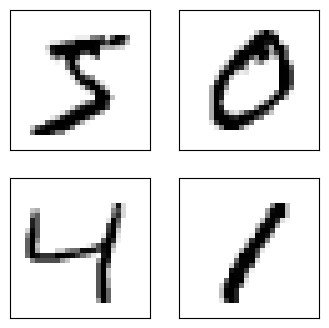

In [47]:
plt.figure(figsize=(4,4))
for i in range(20):
    plt.subplot (2,2, i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()


########################################################################################

In [34]:
########################################Сама Нейронка############################################


model = keras.Sequential([
    Flatten(input_shape= (28,28,1)), 
    Dense(128, activation='relu'), 
    Dense(10, activation = 'softmax')
])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [36]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8663 - loss: 0.4748 - val_accuracy: 0.9573 - val_loss: 0.1517
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9593 - loss: 0.1385 - val_accuracy: 0.9645 - val_loss: 0.1228
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9735 - loss: 0.0923 - val_accuracy: 0.9677 - val_loss: 0.1058
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0662 - val_accuracy: 0.9723 - val_loss: 0.0900
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0486 - val_accuracy: 0.9743 - val_loss: 0.0916


In [37]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9708 - loss: 0.0938


[0.0816352441906929, 0.9751999974250793]

In [38]:
model.save('model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[2.7819826e-09 2.3104116e-10 2.3899458e-08 1.9318398e-04 4.4941856e-03
  1.9166468e-08 2.5081641e-09 3.0032643e-03 1.7798426e-05 9.9229163e-01]]
Распознанная цифра: 9


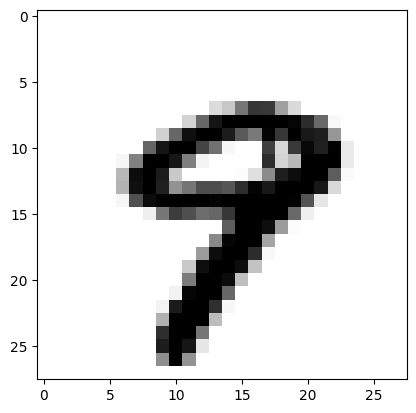

In [52]:
n = 9

x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Распознанная цифра: {np. argmax(res)}")
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [40]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)
print(pred[:20])

print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [41]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(248, 28, 28)


Значение сети: 6


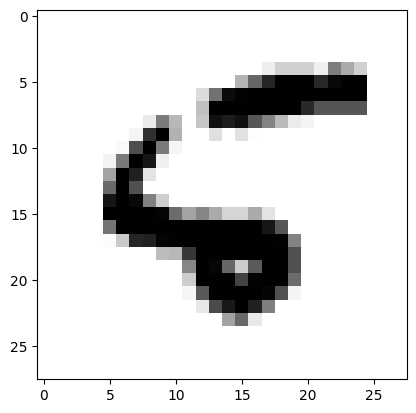

Значение сети: 5


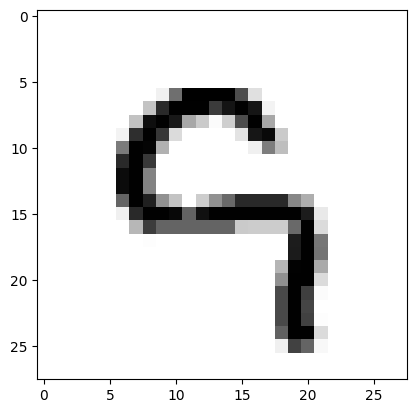

Значение сети: 8


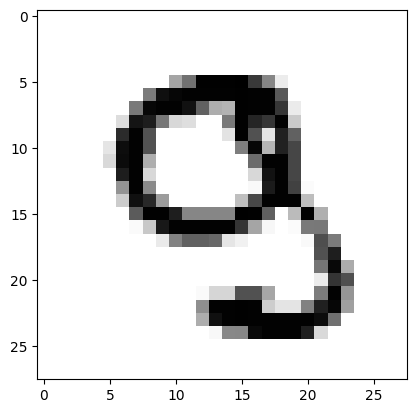

Значение сети: 8


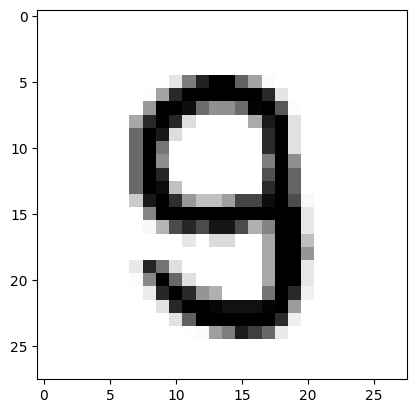

Значение сети: 2


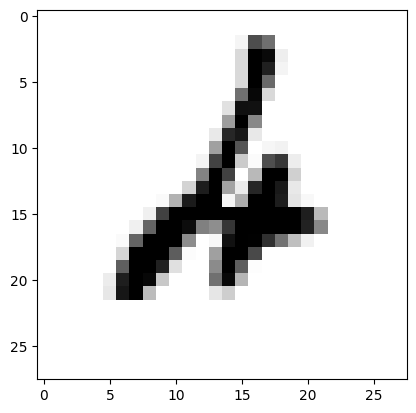

In [42]:
for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

Надеюсь все получится

In [43]:
from tensorflow.keras.models import load_model

# Загрузка ранее сохранённой модели
model = load_model('model.h5')
